This code plots the monthly values between CS2, NASA Team, and CIS as scatter plots, coloured by the season.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap
import glob
import scipy
from scipy import stats
from scipy import interpolate
from matplotlib.colors import Normalize

In [32]:
team_seasonal_means0 = pd.read_csv('/Users/amyswiggs/Desktop/Autumn2023/Chapter2/Northumbria_Spring_Data/NWP_SIC/Mapping_SIC_TC/NASA_Team_Seasonal_Means.csv')
cis_seasonal_means0 = pd.read_csv('/Users/amyswiggs/Desktop/Autumn2023/Chapter2/Northumbria_Spring_Data/NWP_SIC/Mapping_SIC_TC/CIS_Seasonal_Means.csv')
cs2_seasonal_means0 = pd.read_csv('/Users/amyswiggs/Desktop/Autumn2023/Chapter2/Northumbria_Spring_Data/NWP_SIC/Mapping_SIC_TC/CS2_Seasonal_Means.csv')

# As cis data only available to autumn 2022, shorten the other dataframes
team_seasonal_means = team_seasonal_means0[0:51]
cs2_seasonal_means = cs2_seasonal_means0[0:51]
cis_seasonal_means = cis_seasonal_means0[0:51]

team_seasonal_dict = team_seasonal_means.groupby('Season')
cis_seasonal_dict = cis_seasonal_means.groupby('Season')
cs2_seasonal_dict = cs2_seasonal_means.groupby('Season')

seasons = [ 'Autumn', 'Winter','Early-Spring', 'Late-Spring']

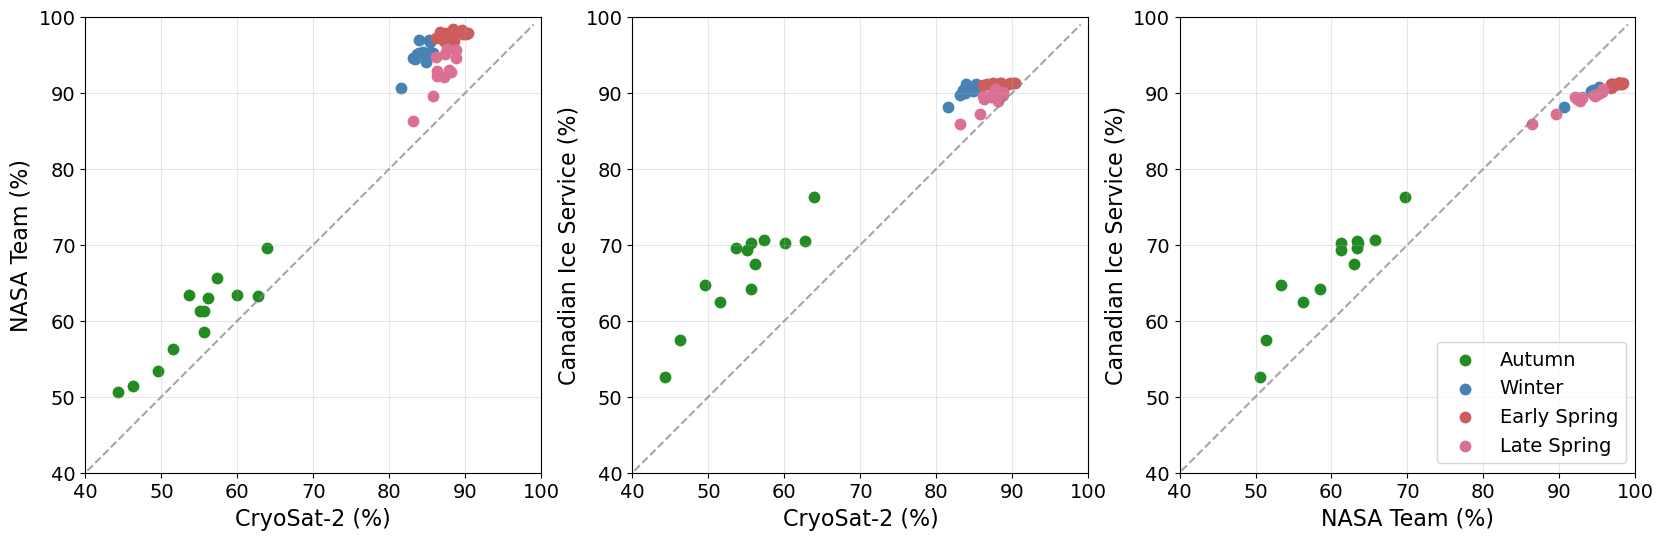

In [39]:
colors = ['forestgreen', 'steelblue', 'indianred', 'palevioletred']

# Create a figure with three subplots
fig, ax = plt.subplots(1, 3, figsize=[20, 16])
plt.rcParams.update({'font.size': 14})

for season, color in zip(seasons, colors):
    ax[0].scatter(cs2_seasonal_dict.get_group(season)['Value'], 
                  team_seasonal_dict.get_group(season)['Value'], 
                  c=color, linewidth=2.5, marker='o', label=season)

    ax[1].scatter(cs2_seasonal_dict.get_group(season)['Value'], 
                  cis_seasonal_dict.get_group(season)['Value'], 
                  c=color, linewidth=2.5, marker='o', label=season)

    ax[2].scatter(team_seasonal_dict.get_group(season)['Value'], 
                  cis_seasonal_dict.get_group(season)['Value'], 
                  c=color, linewidth=2.5, marker='o', label=season)

x_labels = ['CryoSat-2 (%)', 'CryoSat-2 (%)', 'NASA Team (%)']
y_labels = ['NASA Team (%)', 'Canadian Ice Service (%)', 'Canadian Ice Service (%)']

for i in range(3):
    ax[i].plot(np.arange(0, 100), linestyle='--', alpha=0.7, color='grey')  # 1:1 reference line
    ax[i].set_xlabel(x_labels[i], fontsize=16)
    ax[i].set_ylabel(y_labels[i], fontsize=16)
    ax[i].set_xlim(40, 100)
    ax[i].set_ylim(40, 100)
    ax[i].set_aspect('equal')
    ax[i].xaxis.grid(True, 'major', alpha=0.3)
    ax[i].yaxis.grid(True, 'major', alpha=0.3)


ax[2].legend(labels = ['Autumn',
                         'Winter',
                         'Early Spring',
                          'Late Spring'],fontsize=14,loc='lower right')

plt.show()